# Метилфенидат и синдром дефицита внимания

24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.

Каков эффект препарата?

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns

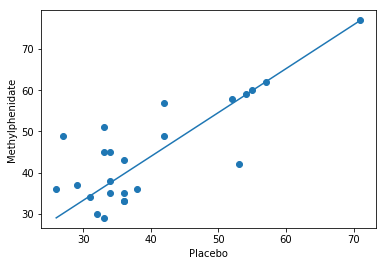

In [2]:
att = np.loadtxt('./ADHD.txt', delimiter=' ', skiprows=1)


plt.scatter(att[:, 0], att[:, 1])
plt.xlabel('Placebo')
plt.ylabel('Methylphenidate')
plt.plot([min(att[:,0]), max(att[:,0])], [min(att[:,1]), max(att[:,1])])

Чтобы использовать критерий Стьюдента для связанных выборок, проверим, нет ли существенных отклонений от нормальности попарных разностей:

(array([1., 0., 5., 2., 5., 5., 3., 1., 1., 1.]),
 array([-11. ,  -7.7,  -4.4,  -1.1,   2.2,   5.5,   8.8,  12.1,  15.4,
         18.7,  22. ]),
 <a list of 10 Patch objects>)

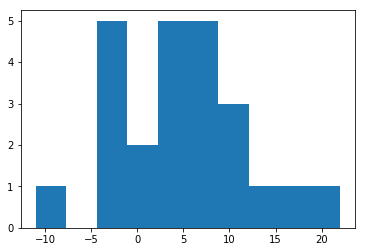

In [4]:
deltas = att[:,1]-att[:,0]
plt.hist(deltas)

In [5]:
#q-q:ваш код

In [8]:
# shapiro: ваш код

Следовательно, критерий Стьюдента применим:

In [9]:
st.ttest_rel(att[:,0], att[:,1])

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок:



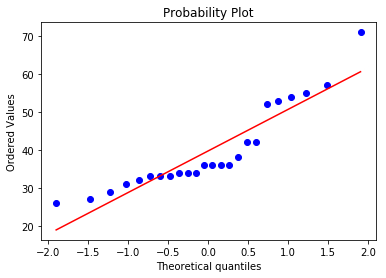

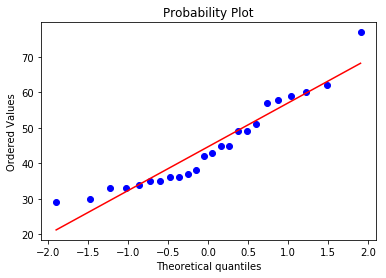

In [9]:
_ = st.probplot(att[:,0], plot=plt)
plt.show()
_ = st.probplot(att[:,1], plot=plt)


In [10]:
print (st.shapiro(att[:,0]))
print (st.shapiro(att[:,1]))

(0.8574873208999634, 0.00302018690854311)
(0.9164453148841858, 0.04876822605729103)


In [11]:
st.ttest_ind(att[:,0], att[:,1])

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

**Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.**